In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import string
import itertools as it
import operator as op
import re
from collections import defaultdict

def rotated(seq, k):
    k %= len(seq)
    return seq[k:] + seq[:k]

def draw_partridge_tiling(n, state, ax=None, title=None, letters=None, highlighted_letters=None, cmap=None):
    if letters is None:
        letters = (" ", " ")
    if highlighted_letters is None:
        highlighted_letters = (-1,-1)
    if cmap is None:
        cmap = {1: '#ff7373', 2: '#00cc00', 3: '#ffa64c', 4: '#7373ff', 5: '#ff73ff', 6: '#55aaff', 7: '#ffff59', 8: '#b89470', 9: '#def0ff'}
    
    grid_len = n*(n+1)//2
    
    thick_lw = 2
    thin_lw = 1
    
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 10))
    
    ax.set_xlim(-1-0.1, grid_len+0.1)
    ax.set_ylim(0-0.1, grid_len+1+0.1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=22)

    for side,(row,col) in state:
        x, y = col, grid_len-row-side
        rect = patches.Rectangle((x,y), side, side, linewidth=thin_lw, edgecolor='black', facecolor=cmap.get(side,'white'))
        ax.add_patch(rect)
        ax.text(x + 0.5*side, y + 0.5*side, str(side), ha='center', va='center', fontsize=16)

    ax.plot([0, grid_len, grid_len, 0, 0], [0, 0, grid_len, grid_len, 0], color='black', linewidth=thick_lw)
    
    font_sty = {True: {'color':'red', 'fontweight': 'bold', 'fontsize': 16}, False: {'fontsize': 16}}
    for i,c in enumerate(it.islice(it.cycle(letters[0]), grid_len), 0):
        ax.text(-0.5-0.1, grid_len-i-0.5, c, ha='center', va='center',  **font_sty[highlighted_letters[0] == i])
    for i,c in enumerate(it.islice(it.cycle(letters[1]), grid_len), 0):
        ax.text(i + 0.5, grid_len+0.5+0.1, c, ha='center', va='center', **font_sty[highlighted_letters[1] == i])
    
    return ax



In [3]:
log="""
Starting some_ones_somewhere. Initializing threads
Start completing tiling (0,2): [(2, (5, 30)), (3, (29, 20)), (3, (24, 28)), (4, (5, 26)), (4, (41, 37)), (4, (41, 41)), (5, (0, 26)), (5, (34, 23)), (5, (29, 23)), (6, (39, 16)), (6, (39, 22)), (6, (21, 31)), (6, (15, 31)), (7, (16, 9)), (7, (38, 9)), (7, (9, 17)), (7, (32, 16)), (8, (0, 9)), (8, (8, 9)), (8, (33, 37)), (8, (25, 37)), (8, (17, 37)), (9, (0, 0)), (9, (9, 0)), (9, (18, 0)), (9, (27, 0)), (9, (36, 0)), (9, (0, 17)), (9, (0, 36)), (9, (36, 28)), (9, (27, 28))]
Start completing tiling (0,0): [(3, (4, 12)), (4, (0, 33)), (4, (4, 33)), (4, (0, 11)), (5, (24, 9)), (5, (19, 9)), (5, (8, 33)), (6, (13, 9)), (7, (38, 31)), (7, (38, 38)), (7, (15, 38)), (7, (8, 38)), (8, (37, 9)), (8, (29, 9)), (8, (30, 37)), (8, (30, 29)), (8, (22, 37)), (8, (0, 37)), (9, (9, 0)), (9, (18, 0)), (9, (27, 0)), (9, (36, 0)), (9, (13, 29)), (9, (0, 24)), (9, (0, 15))]
Start completing tiling (1,2): [(2, (20, 34)), (3, (26, 9)), (4, (0, 9)), (4, (0, 13)), (5, (40, 35)), (5, (40, 40)), (6, (7, 33)), (6, (7, 39)), (6, (22, 39)), (6, (28, 39)), (6, (34, 39)), (7, (0, 17)), (7, (0, 24)), (7, (0, 31)), (7, (0, 38)), (7, (22, 32)), (7, (29, 17)), (8, (7, 25)), (8, (37, 9)), (8, (29, 9)), (9, (0, 0)), (9, (9, 0)), (9, (18, 0)), (9, (27, 0)), (9, (36, 0)), (9, (13, 36)), (9, (36, 17))]
Start completing tiling (1,0): [(2, (33, 35)), (3, (9, 15)), (3, (17, 5)), (4, (16, 8)), (4, (35, 33)), (4, (15, 33)), (5, (17, 0)), (5, (22, 0)), (5, (28, 32)), (6, (0, 18)), (6, (6, 18)), (6, (39, 39)), (6, (39, 33)), (7, (9, 8)), (7, (20, 5)), (7, (0, 31)), (7, (0, 38)), (8, (9, 0)), (8, (7, 37)), (8, (15, 37)), (8, (23, 37)), (8, (31, 37)), (9, (0, 0)), (9, (0, 9)), (9, (36, 0)), (9, (36, 9)), (9, (36, 18)), (9, (27, 0)), (9, (19, 28))]
Start completing tiling (2,1): [(2, (5, 34)), (3, (34, 42)), (4, (0, 27)), (4, (41, 25)), (5, (0, 31)), (5, (9, 22)), (6, (9, 16)), (6, (15, 16)), (7, (9, 38)), (7, (16, 38)), (7, (9, 9)), (7, (16, 9)), (7, (14, 22)), (8, (23, 37)), (8, (21, 16)), (8, (37, 37)), (8, (37, 29)), (9, (0, 0)), (9, (0, 9)), (9, (0, 18)), (9, (9, 0)), (9, (18, 0)), (9, (0, 36)), (9, (27, 0))]
Start completing tiling (1,1): [(3, (12, 42)), (4, (2, 0)), (4, (25, 33)), (5, (6, 7)), (5, (6, 12)), (5, (7, 31)), (6, (15, 39)), (7, (13, 0)), (7, (6, 0)), (7, (29, 31)), (7, (29, 38)), (7, (0, 29)), (7, (0, 22)), (8, (28, 0)), (8, (28, 8)), (8, (28, 16)), (8, (20, 0)), (8, (20, 8)), (8, (21, 37)), (9, (36, 0)), (9, (36, 9)), (9, (11, 7)), (9, (36, 36)), (9, (0, 36))]
Start completing tiling (2,0): [(2, (38, 34)), (3, (12, 17)), (4, (36, 26)), (4, (16, 41)), (5, (40, 26)), (5, (40, 31)), (6, (0, 22)), (7, (15, 9)), (7, (22, 9)), (7, (0, 9)), (7, (15, 16)), (7, (29, 17)), (8, (7, 9)), (8, (37, 9)), (8, (29, 9)), (8, (28, 37)), (8, (20, 37)), (8, (0, 37)), (9, (0, 0)), (9, (9, 0)), (9, (18, 0)), (9, (27, 0)), (9, (36, 0)), (9, (36, 17)), (9, (36, 36)), (9, (0, 28))]
Start completing tiling (2,2): [(3, (25, 7)), (4, (24, 20)), (4, (0, 23)), (5, (31, 31)), (5, (26, 31)), (5, (21, 31)), (5, (0, 18)), (6, (0, 0)), (6, (0, 6)), (6, (0, 12)), (7, (22, 0)), (7, (29, 0)), (7, (21, 24)), (8, (28, 7)), (8, (28, 15)), (8, (28, 23)), (8, (6, 0)), (8, (6, 8)), (9, (36, 0)), (9, (36, 9)), (9, (36, 18)), (9, (36, 27)), (9, (36, 36)), (9, (27, 36)), (9, (18, 36))]
Start completing tiling (0,1): [(3, (25, 21)), (3, (4, 9)), (4, (0, 0)), (4, (0, 4)), (4, (0, 8)), (5, (24, 16)), (5, (0, 40)), (5, (5, 40)), (6, (0, 26)), (7, (29, 0)), (7, (29, 7)), (7, (29, 14)), (7, (0, 19)), (7, (0, 12)), (8, (28, 21)), (8, (28, 29)), (8, (28, 37)), (8, (0, 32)), (8, (13, 0)), (8, (13, 8)), (9, (36, 0)), (9, (36, 9)), (9, (36, 18)), (9, (36, 27)), (9, (36, 36)), (9, (19, 36)), (9, (19, 27)), (9, (10, 36)), (9, (4, 0))]
Found the solution: [(1, (31, 16)), (2, (5, 30)), (2, (7, 30)), (3, (29, 20)), (3, (24, 28)), (3, (29, 17)), (4, (5, 26)), (4, (41, 37)), (4, (41, 41)), (4, (5, 32)), (5, (0, 26)), (5, (34, 23)), (5, (29, 23)), (5, (0, 31)), (5, (24, 23)), (6, (39, 16)), (6, (39, 22)), (6, (21, 31)), (6, (15, 31)), (6, (9, 31)), (6, (23, 17)), (7, (16, 9)), (7, (38, 9)), (7, (9, 17)), (7, (32, 16)), (7, (9, 24)), (7, (16, 16)), (7, (31, 9)), (8, (0, 9)), (8, (8, 9)), (8, (33, 37)), (8, (25, 37)), (8, (17, 37)), (8, (9, 37)), (8, (16, 23)), (8, (23, 9)), (9, (0, 0)), (9, (9, 0)), (9, (18, 0)), (9, (27, 0)), (9, (36, 0)), (9, (0, 17)), (9, (0, 36)), (9, (36, 28)), (9, (27, 28))]
Found a single solution for tiling (0,2): [(1, (31, 16)), (2, (5, 30)), (2, (7, 30)), (3, (29, 20)), (3, (24, 28)), (3, (29, 17)), (4, (5, 26)), (4, (41, 37)), (4, (41, 41)), (4, (5, 32)), (5, (0, 26)), (5, (34, 23)), (5, (29, 23)), (5, (0, 31)), (5, (24, 23)), (6, (39, 16)), (6, (39, 22)), (6, (21, 31)), (6, (15, 31)), (6, (9, 31)), (6, (23, 17)), (7, (16, 9)), (7, (38, 9)), (7, (9, 17)), (7, (32, 16)), (7, (9, 24)), (7, (16, 16)), (7, (31, 9)), (8, (0, 9)), (8, (8, 9)), (8, (33, 37)), (8, (25, 37)), (8, (17, 37)), (8, (9, 37)), (8, (16, 23)), (8, (23, 9)), (9, (0, 0)), (9, (9, 0)), (9, (18, 0)), (9, (27, 0)), (9, (36, 0)), (9, (0, 17)), (9, (0, 36)), (9, (36, 28)), (9, (27, 28))]
Found the solution: [(1, (27, 27)), (2, (33, 35)), (2, (33, 33)), (3, (9, 15)), (3, (17, 5)), (3, (16, 12)), (4, (16, 8)), (4, (35, 33)), (4, (15, 33)), (4, (15, 29)), (5, (17, 0)), (5, (22, 0)), (5, (28, 32)), (5, (7, 24)), (5, (28, 27)), (6, (0, 18)), (6, (6, 18)), (6, (39, 39)), (6, (39, 33)), (6, (33, 27)), (6, (39, 27)), (7, (9, 8)), (7, (20, 5)), (7, (0, 31)), (7, (0, 38)), (7, (0, 24)), (7, (12, 15)), (7, (12, 22)), (8, (9, 0)), (8, (7, 37)), (8, (15, 37)), (8, (23, 37)), (8, (31, 37)), (8, (7, 29)), (8, (19, 12)), (8, (19, 20)), (9, (0, 0)), (9, (0, 9)), (9, (36, 0)), (9, (36, 9)), (9, (36, 18)), (9, (27, 0)), (9, (19, 28)), (9, (27, 9)), (9, (27, 18))]
Found a single solution for tiling (1,0): [(1, (27, 27)), (2, (33, 35)), (2, (33, 33)), (3, (9, 15)), (3, (17, 5)), (3, (16, 12)), (4, (16, 8)), (4, (35, 33)), (4, (15, 33)), (4, (15, 29)), (5, (17, 0)), (5, (22, 0)), (5, (28, 32)), (5, (7, 24)), (5, (28, 27)), (6, (0, 18)), (6, (6, 18)), (6, (39, 39)), (6, (39, 33)), (6, (33, 27)), (6, (39, 27)), (7, (9, 8)), (7, (20, 5)), (7, (0, 31)), (7, (0, 38)), (7, (0, 24)), (7, (12, 15)), (7, (12, 22)), (8, (9, 0)), (8, (7, 37)), (8, (15, 37)), (8, (23, 37)), (8, (31, 37)), (8, (7, 29)), (8, (19, 12)), (8, (19, 20)), (9, (0, 0)), (9, (0, 9)), (9, (36, 0)), (9, (36, 9)), (9, (36, 18)), (9, (27, 0)), (9, (19, 28)), (9, (27, 9)), (9, (27, 18))]
Found the solution: [(1, (11, 25)), (2, (0, 0)), (2, (0, 2)), (3, (12, 42)), (3, (9, 42)), (3, (12, 33)), (4, (2, 0)), (4, (25, 33)), (4, (7, 22)), (4, (21, 33)), (5, (6, 7)), (5, (6, 12)), (5, (7, 31)), (5, (6, 17)), (5, (7, 26)), (6, (15, 39)), (6, (0, 4)), (6, (0, 10)), (6, (0, 16)), (6, (9, 36)), (6, (15, 33)), (7, (13, 0)), (7, (6, 0)), (7, (29, 31)), (7, (29, 38)), (7, (0, 29)), (7, (0, 22)), (7, (29, 24)), (8, (28, 0)), (8, (28, 8)), (8, (28, 16)), (8, (20, 0)), (8, (20, 8)), (8, (21, 37)), (8, (12, 25)), (8, (20, 16)), (9, (36, 0)), (9, (36, 9)), (9, (11, 7)), (9, (36, 36)), (9, (0, 36)), (9, (11, 16)), (9, (20, 24)), (9, (36, 18)), (9, (36, 27))]
Found a single solution for tiling (1,1): [(1, (11, 25)), (2, (0, 0)), (2, (0, 2)), (3, (12, 42)), (3, (9, 42)), (3, (12, 33)), (4, (2, 0)), (4, (25, 33)), (4, (7, 22)), (4, (21, 33)), (5, (6, 7)), (5, (6, 12)), (5, (7, 31)), (5, (6, 17)), (5, (7, 26)), (6, (15, 39)), (6, (0, 4)), (6, (0, 10)), (6, (0, 16)), (6, (9, 36)), (6, (15, 33)), (7, (13, 0)), (7, (6, 0)), (7, (29, 31)), (7, (29, 38)), (7, (0, 29)), (7, (0, 22)), (7, (29, 24)), (8, (28, 0)), (8, (28, 8)), (8, (28, 16)), (8, (20, 0)), (8, (20, 8)), (8, (21, 37)), (8, (12, 25)), (8, (20, 16)), (9, (36, 0)), (9, (36, 9)), (9, (11, 7)), (9, (36, 36)), (9, (0, 36)), (9, (11, 16)), (9, (20, 24)), (9, (36, 18)), (9, (36, 27))]
Found the solution: [(1, (18, 20)), (2, (0, 9)), (2, (2, 9)), (3, (4, 12)), (3, (4, 9)), (3, (26, 14)), (4, (0, 33)), (4, (4, 33)), (4, (0, 11)), (4, (9, 29)), (5, (24, 9)), (5, (19, 9)), (5, (8, 33)), (5, (9, 15)), (5, (14, 15)), (6, (13, 9)), (6, (7, 9)), (6, (26, 17)), (6, (26, 23)), (6, (32, 17)), (6, (32, 23)), (7, (38, 31)), (7, (38, 38)), (7, (15, 38)), (7, (8, 38)), (7, (19, 14)), (7, (38, 17)), (7, (38, 24)), (8, (37, 9)), (8, (29, 9)), (8, (30, 37)), (8, (30, 29)), (8, (22, 37)), (8, (0, 37)), (8, (18, 21)), (8, (22, 29)), (9, (9, 0)), (9, (18, 0)), (9, (27, 0)), (9, (36, 0)), (9, (13, 29)), (9, (0, 24)), (9, (0, 15)), (9, (0, 0)), (9, (9, 20))]
Found the solution: [(1, (6, 16)), (2, (38, 34)), (2, (36, 34)), (3, (12, 17)), (3, (12, 20)), (3, (18, 28)), (4, (36, 26)), (4, (16, 41)), (4, (16, 37)), (4, (36, 30)), (5, (40, 26)), (5, (40, 31)), (5, (6, 23)), (5, (11, 23)), (5, (16, 23)), (6, (0, 22)), (6, (0, 16)), (6, (6, 17)), (6, (18, 31)), (6, (24, 31)), (6, (30, 31)), (7, (15, 9)), (7, (22, 9)), (7, (0, 9)), (7, (15, 16)), (7, (29, 17)), (7, (22, 16)), (7, (29, 24)), (8, (7, 9)), (8, (37, 9)), (8, (29, 9)), (8, (28, 37)), (8, (20, 37)), (8, (0, 37)), (8, (8, 37)), (8, (21, 23)), (9, (0, 0)), (9, (9, 0)), (9, (18, 0)), (9, (27, 0)), (9, (36, 0)), (9, (36, 17)), (9, (36, 36)), (9, (0, 28)), (9, (9, 28))]
Found the solution: [(1, (15, 32)), (2, (20, 34)), (2, (20, 32)), (3, (26, 9)), (3, (13, 33)), (3, (26, 12)), (4, (0, 9)), (4, (0, 13)), (4, (16, 32)), (4, (36, 35)), (5, (40, 35)), (5, (40, 40)), (5, (15, 17)), (5, (15, 22)), (5, (15, 27)), (6, (7, 33)), (6, (7, 39)), (6, (22, 39)), (6, (28, 39)), (6, (34, 39)), (6, (20, 9)), (7, (0, 17)), (7, (0, 24)), (7, (0, 31)), (7, (0, 38)), (7, (22, 32)), (7, (29, 17)), (7, (29, 32)), (8, (7, 25)), (8, (37, 9)), (8, (29, 9)), (8, (4, 9)), (8, (7, 17)), (8, (12, 9)), (8, (20, 24)), (8, (28, 24)), (9, (0, 0)), (9, (9, 0)), (9, (18, 0)), (9, (27, 0)), (9, (36, 0)), (9, (13, 36)), (9, (36, 17)), (9, (20, 15)), (9, (36, 26))]
Found a single solution for tiling (1,2): [(1, (15, 32)), (2, (20, 34)), (2, (20, 32)), (3, (26, 9)), (3, (13, 33)), (3, (26, 12)), (4, (0, 9)), (4, (0, 13)), (4, (16, 32)), (4, (36, 35)), (5, (40, 35)), (5, (40, 40)), (5, (15, 17)), (5, (15, 22)), (5, (15, 27)), (6, (7, 33)), (6, (7, 39)), (6, (22, 39)), (6, (28, 39)), (6, (34, 39)), (6, (20, 9)), (7, (0, 17)), (7, (0, 24)), (7, (0, 31)), (7, (0, 38)), (7, (22, 32)), (7, (29, 17)), (7, (29, 32)), (8, (7, 25)), (8, (37, 9)), (8, (29, 9)), (8, (4, 9)), (8, (7, 17)), (8, (12, 9)), (8, (20, 24)), (8, (28, 24)), (9, (0, 0)), (9, (9, 0)), (9, (18, 0)), (9, (27, 0)), (9, (36, 0)), (9, (13, 36)), (9, (36, 17)), (9, (20, 15)), (9, (36, 26))]
Found the solution: [(1, (12, 21)), (2, (8, 36)), (2, (8, 38)), (3, (25, 21)), (3, (4, 9)), (3, (25, 24)), (4, (0, 0)), (4, (0, 4)), (4, (0, 8)), (4, (8, 32)), (5, (24, 16)), (5, (0, 40)), (5, (5, 40)), (5, (7, 21)), (5, (19, 16)), (6, (0, 26)), (6, (6, 26)), (6, (7, 9)), (6, (7, 15)), (6, (13, 16)), (6, (19, 21)), (7, (29, 0)), (7, (29, 7)), (7, (29, 14)), (7, (0, 19)), (7, (0, 12)), (7, (12, 22)), (7, (12, 29)), (8, (28, 21)), (8, (28, 29)), (8, (28, 37)), (8, (0, 32)), (8, (13, 0)), (8, (13, 8)), (8, (21, 0)), (8, (21, 8)), (9, (36, 0)), (9, (36, 9)), (9, (36, 18)), (9, (36, 27)), (9, (36, 36)), (9, (19, 36)), (9, (19, 27)), (9, (10, 36)), (9, (4, 0))]
Found a single solution for tiling (0,1): [(1, (12, 21)), (2, (8, 36)), (2, (8, 38)), (3, (25, 21)), (3, (4, 9)), (3, (25, 24)), (4, (0, 0)), (4, (0, 4)), (4, (0, 8)), (4, (8, 32)), (5, (24, 16)), (5, (0, 40)), (5, (5, 40)), (5, (7, 21)), (5, (19, 16)), (6, (0, 26)), (6, (6, 26)), (6, (7, 9)), (6, (7, 15)), (6, (13, 16)), (6, (19, 21)), (7, (29, 0)), (7, (29, 7)), (7, (29, 14)), (7, (0, 19)), (7, (0, 12)), (7, (12, 22)), (7, (12, 29)), (8, (28, 21)), (8, (28, 29)), (8, (28, 37)), (8, (0, 32)), (8, (13, 0)), (8, (13, 8)), (8, (21, 0)), (8, (21, 8)), (9, (36, 0)), (9, (36, 9)), (9, (36, 18)), (9, (36, 27)), (9, (36, 36)), (9, (19, 36)), (9, (19, 27)), (9, (10, 36)), (9, (4, 0))]
Found the solution: [(1, (8, 33)), (2, (5, 34)), (2, (7, 34)), (3, (34, 42)), (3, (5, 31)), (3, (31, 42)), (4, (0, 27)), (4, (41, 25)), (4, (4, 27)), (4, (37, 25)), (5, (0, 31)), (5, (9, 22)), (5, (9, 33)), (5, (21, 24)), (5, (26, 24)), (6, (9, 16)), (6, (15, 16)), (6, (8, 27)), (6, (31, 24)), (6, (31, 30)), (6, (31, 36)), (7, (9, 38)), (7, (16, 38)), (7, (9, 9)), (7, (16, 9)), (7, (14, 22)), (7, (23, 9)), (7, (30, 9)), (8, (23, 37)), (8, (21, 16)), (8, (37, 37)), (8, (37, 29)), (8, (23, 29)), (8, (29, 16)), (8, (37, 9)), (8, (37, 17)), (9, (0, 0)), (9, (0, 9)), (9, (0, 18)), (9, (9, 0)), (9, (18, 0)), (9, (0, 36)), (9, (27, 0)), (9, (14, 29)), (9, (36, 0))]
Found a single solution for tiling (2,1): [(1, (8, 33)), (2, (5, 34)), (2, (7, 34)), (3, (34, 42)), (3, (5, 31)), (3, (31, 42)), (4, (0, 27)), (4, (41, 25)), (4, (4, 27)), (4, (37, 25)), (5, (0, 31)), (5, (9, 22)), (5, (9, 33)), (5, (21, 24)), (5, (26, 24)), (6, (9, 16)), (6, (15, 16)), (6, (8, 27)), (6, (31, 24)), (6, (31, 30)), (6, (31, 36)), (7, (9, 38)), (7, (16, 38)), (7, (9, 9)), (7, (16, 9)), (7, (14, 22)), (7, (23, 9)), (7, (30, 9)), (8, (23, 37)), (8, (21, 16)), (8, (37, 37)), (8, (37, 29)), (8, (23, 29)), (8, (29, 16)), (8, (37, 9)), (8, (37, 17)), (9, (0, 0)), (9, (0, 9)), (9, (0, 18)), (9, (9, 0)), (9, (18, 0)), (9, (0, 36)), (9, (27, 0)), (9, (14, 29)), (9, (36, 0))]
Found a single solution for tiling (2,0): [(1, (6, 16)), (2, (38, 34)), (2, (36, 34)), (3, (12, 17)), (3, (12, 20)), (3, (18, 28)), (4, (36, 26)), (4, (16, 41)), (4, (16, 37)), (4, (36, 30)), (5, (40, 26)), (5, (40, 31)), (5, (6, 23)), (5, (11, 23)), (5, (16, 23)), (6, (0, 22)), (6, (0, 16)), (6, (6, 17)), (6, (18, 31)), (6, (24, 31)), (6, (30, 31)), (7, (15, 9)), (7, (22, 9)), (7, (0, 9)), (7, (15, 16)), (7, (29, 17)), (7, (22, 16)), (7, (29, 24)), (8, (7, 9)), (8, (37, 9)), (8, (29, 9)), (8, (28, 37)), (8, (20, 37)), (8, (0, 37)), (8, (8, 37)), (8, (21, 23)), (9, (0, 0)), (9, (9, 0)), (9, (18, 0)), (9, (27, 0)), (9, (36, 0)), (9, (36, 17)), (9, (36, 36)), (9, (0, 28)), (9, (9, 28))]
Found a single solution for tiling (0,0): [(1, (18, 20)), (2, (0, 9)), (2, (2, 9)), (3, (4, 12)), (3, (4, 9)), (3, (26, 14)), (4, (0, 33)), (4, (4, 33)), (4, (0, 11)), (4, (9, 29)), (5, (24, 9)), (5, (19, 9)), (5, (8, 33)), (5, (9, 15)), (5, (14, 15)), (6, (13, 9)), (6, (7, 9)), (6, (26, 17)), (6, (26, 23)), (6, (32, 17)), (6, (32, 23)), (7, (38, 31)), (7, (38, 38)), (7, (15, 38)), (7, (8, 38)), (7, (19, 14)), (7, (38, 17)), (7, (38, 24)), (8, (37, 9)), (8, (29, 9)), (8, (30, 37)), (8, (30, 29)), (8, (22, 37)), (8, (0, 37)), (8, (18, 21)), (8, (22, 29)), (9, (9, 0)), (9, (18, 0)), (9, (27, 0)), (9, (36, 0)), (9, (13, 29)), (9, (0, 24)), (9, (0, 15)), (9, (0, 0)), (9, (9, 20))]
Found the solution: [(1, (5, 18)), (2, (0, 27)), (2, (2, 27)), (3, (25, 7)), (3, (6, 16)), (3, (22, 7)), (4, (24, 20)), (4, (0, 23)), (4, (5, 19)), (4, (24, 16)), (5, (31, 31)), (5, (26, 31)), (5, (21, 31)), (5, (0, 18)), (5, (16, 24)), (6, (0, 0)), (6, (0, 6)), (6, (0, 12)), (6, (4, 23)), (6, (10, 23)), (6, (22, 10)), (7, (22, 0)), (7, (29, 0)), (7, (21, 24)), (7, (0, 29)), (7, (7, 29)), (7, (9, 16)), (7, (14, 29)), (8, (28, 7)), (8, (28, 15)), (8, (28, 23)), (8, (6, 0)), (8, (6, 8)), (8, (14, 0)), (8, (14, 8)), (8, (16, 16)), (9, (36, 0)), (9, (36, 9)), (9, (36, 18)), (9, (36, 27)), (9, (36, 36)), (9, (27, 36)), (9, (18, 36)), (9, (0, 36)), (9, (9, 36))]
Found a single solution for tiling (2,2): [(1, (5, 18)), (2, (0, 27)), (2, (2, 27)), (3, (25, 7)), (3, (6, 16)), (3, (22, 7)), (4, (24, 20)), (4, (0, 23)), (4, (5, 19)), (4, (24, 16)), (5, (31, 31)), (5, (26, 31)), (5, (21, 31)), (5, (0, 18)), (5, (16, 24)), (6, (0, 0)), (6, (0, 6)), (6, (0, 12)), (6, (4, 23)), (6, (10, 23)), (6, (22, 10)), (7, (22, 0)), (7, (29, 0)), (7, (21, 24)), (7, (0, 29)), (7, (7, 29)), (7, (9, 16)), (7, (14, 29)), (8, (28, 7)), (8, (28, 15)), (8, (28, 23)), (8, (6, 0)), (8, (6, 8)), (8, (14, 0)), (8, (14, 8)), (8, (16, 16)), (9, (36, 0)), (9, (36, 9)), (9, (36, 18)), (9, (36, 27)), (9, (36, 36)), (9, (27, 36)), (9, (18, 36)), (9, (0, 36)), (9, (9, 36))]
Found all solutions
"""

tilings = defaultdict(dict)
for m in re.finditer(r".*Start completing tiling (.+?): (.+)", log):
    k,g = map(eval, m.groups())
    tilings[k].update({'initial': g})
for m in re.finditer(r".*Found a single solution for tiling (.+?): (.+)", log):
    k,g = map(eval, m.groups())
    tilings[k].update({'final': g})

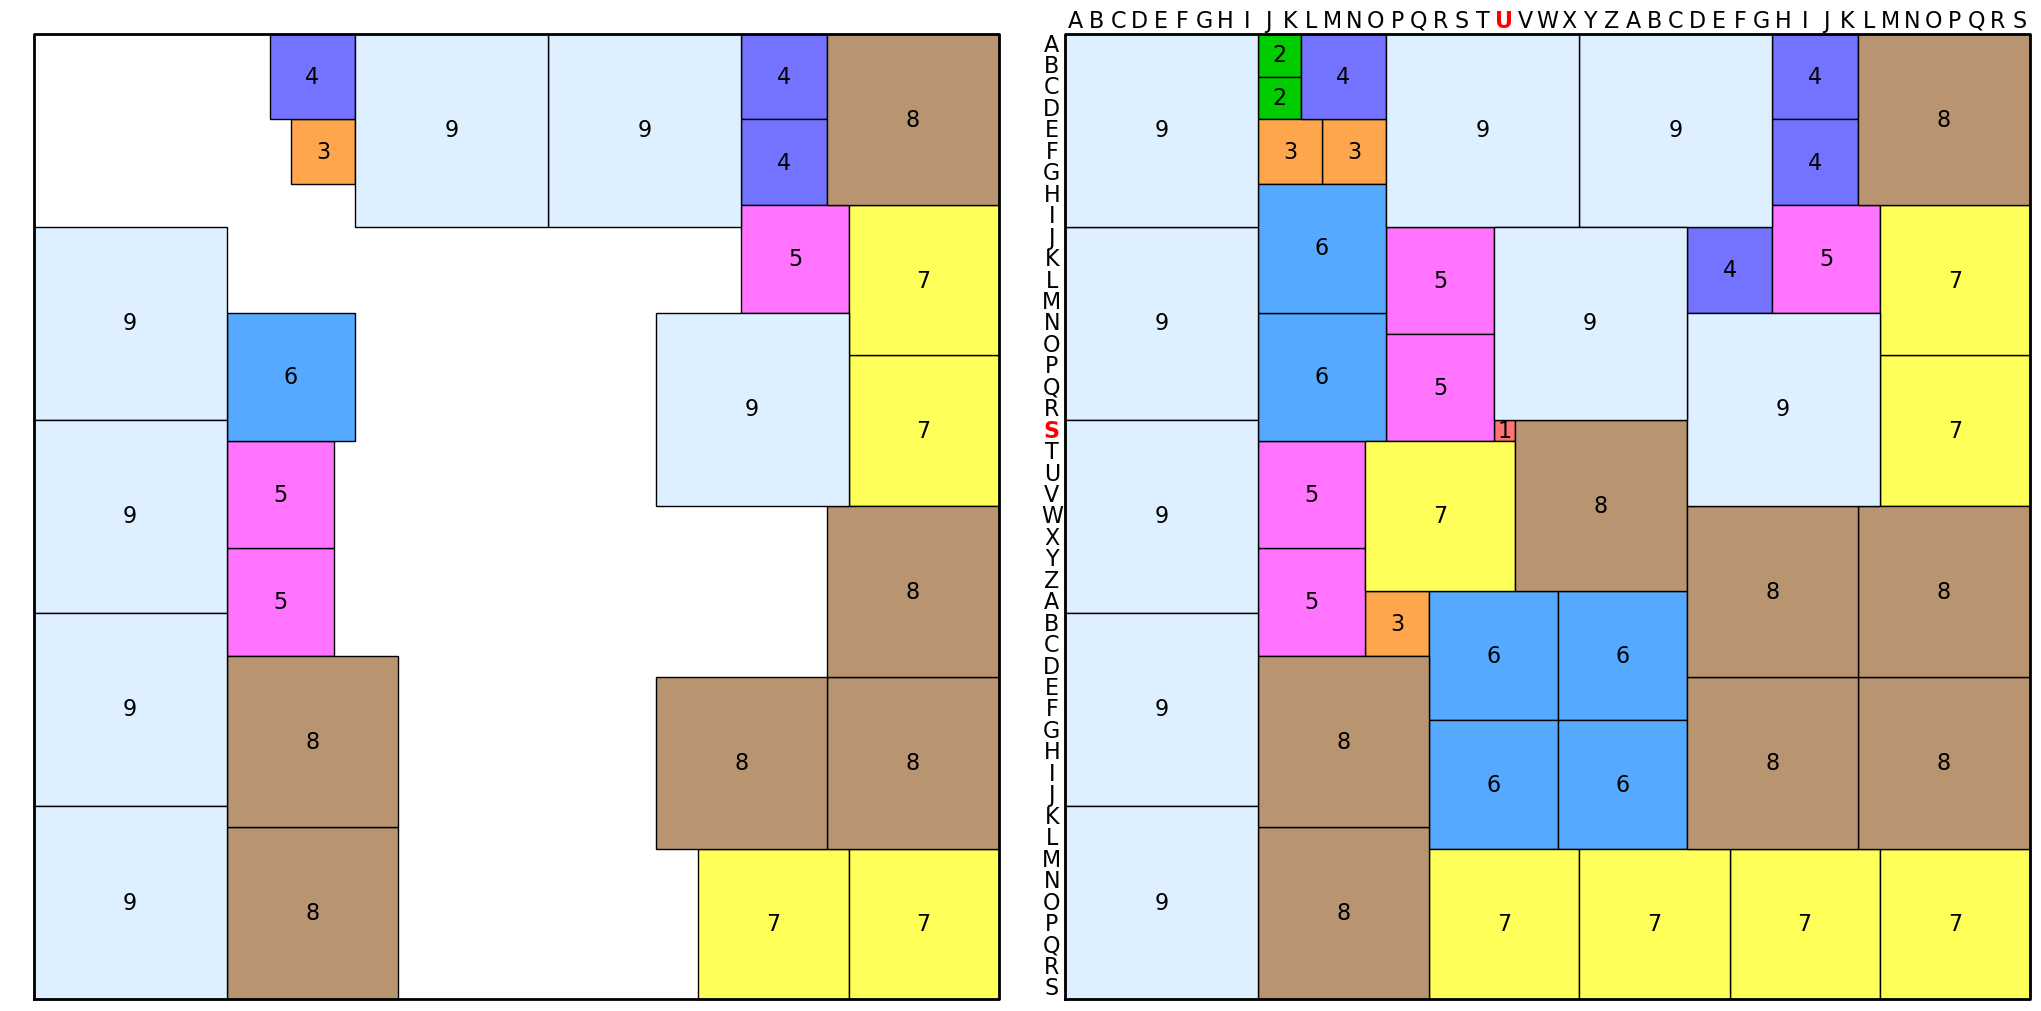

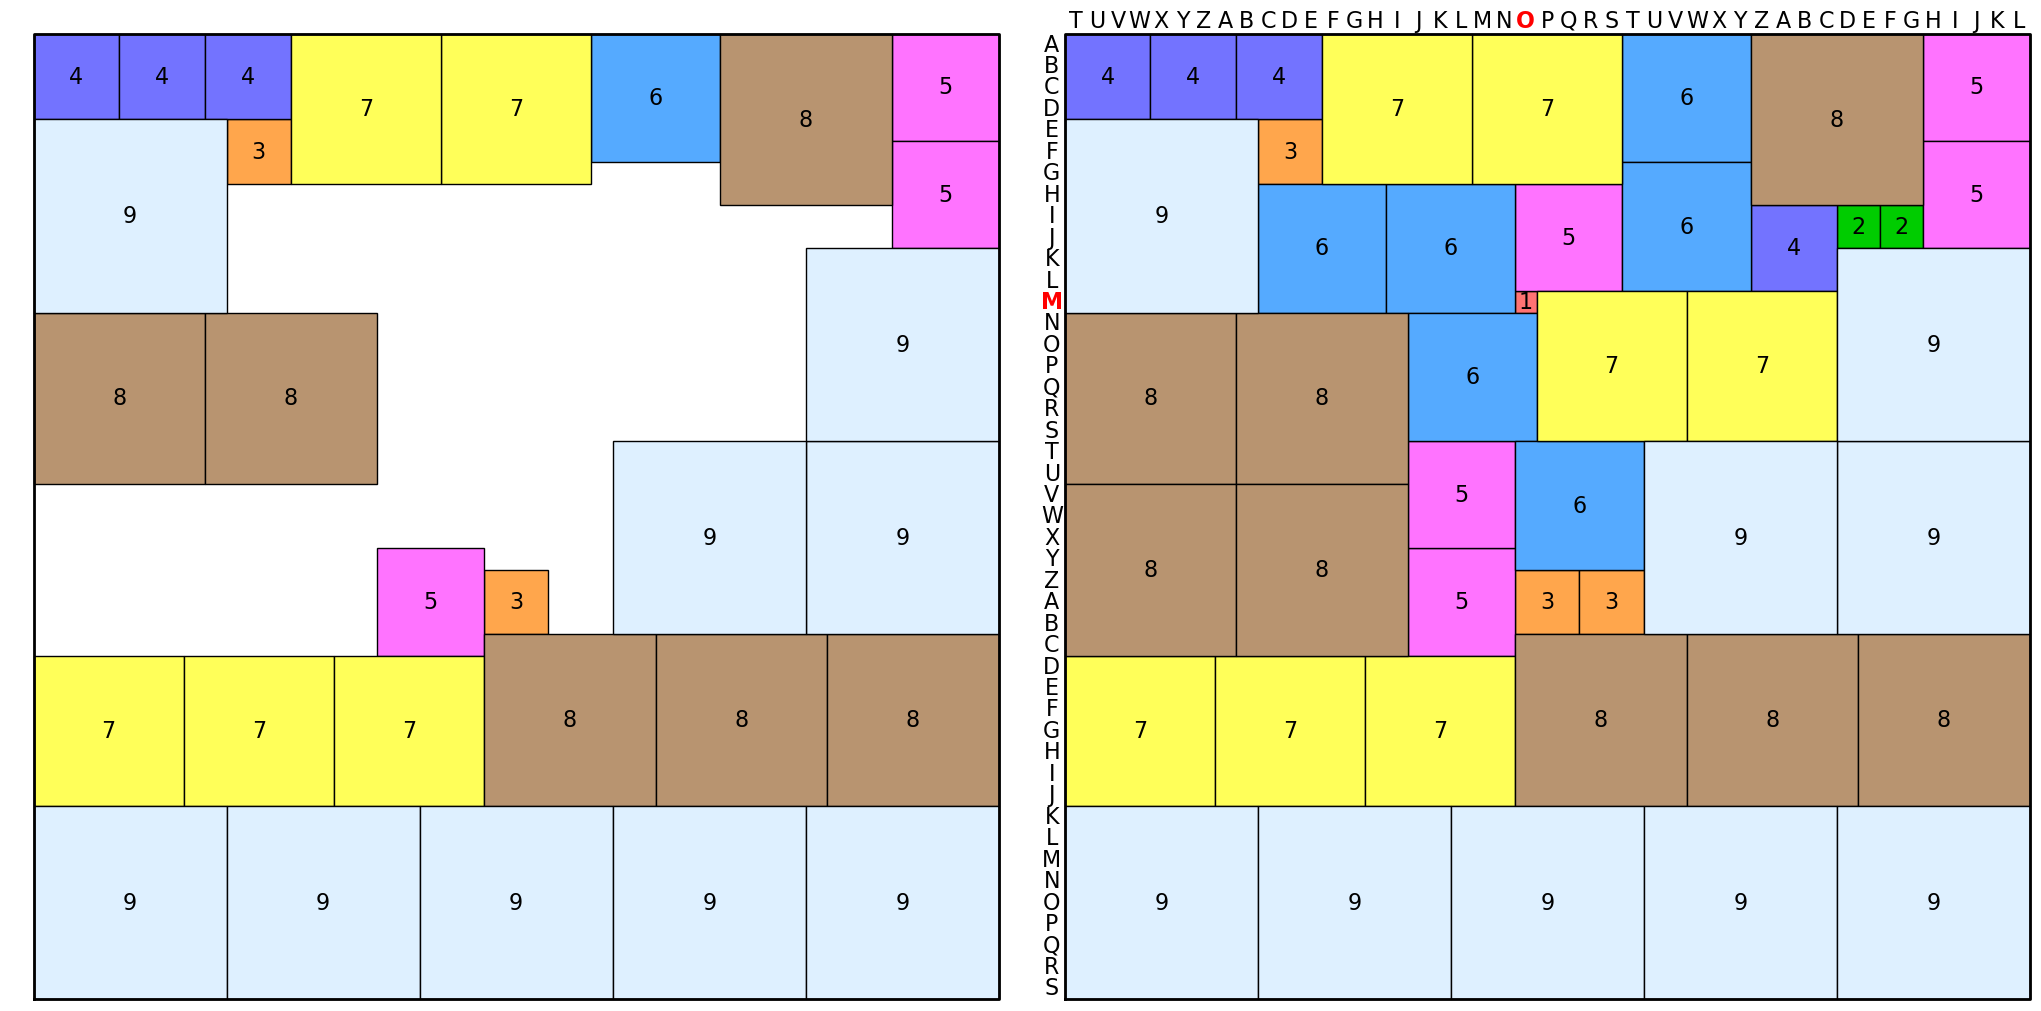

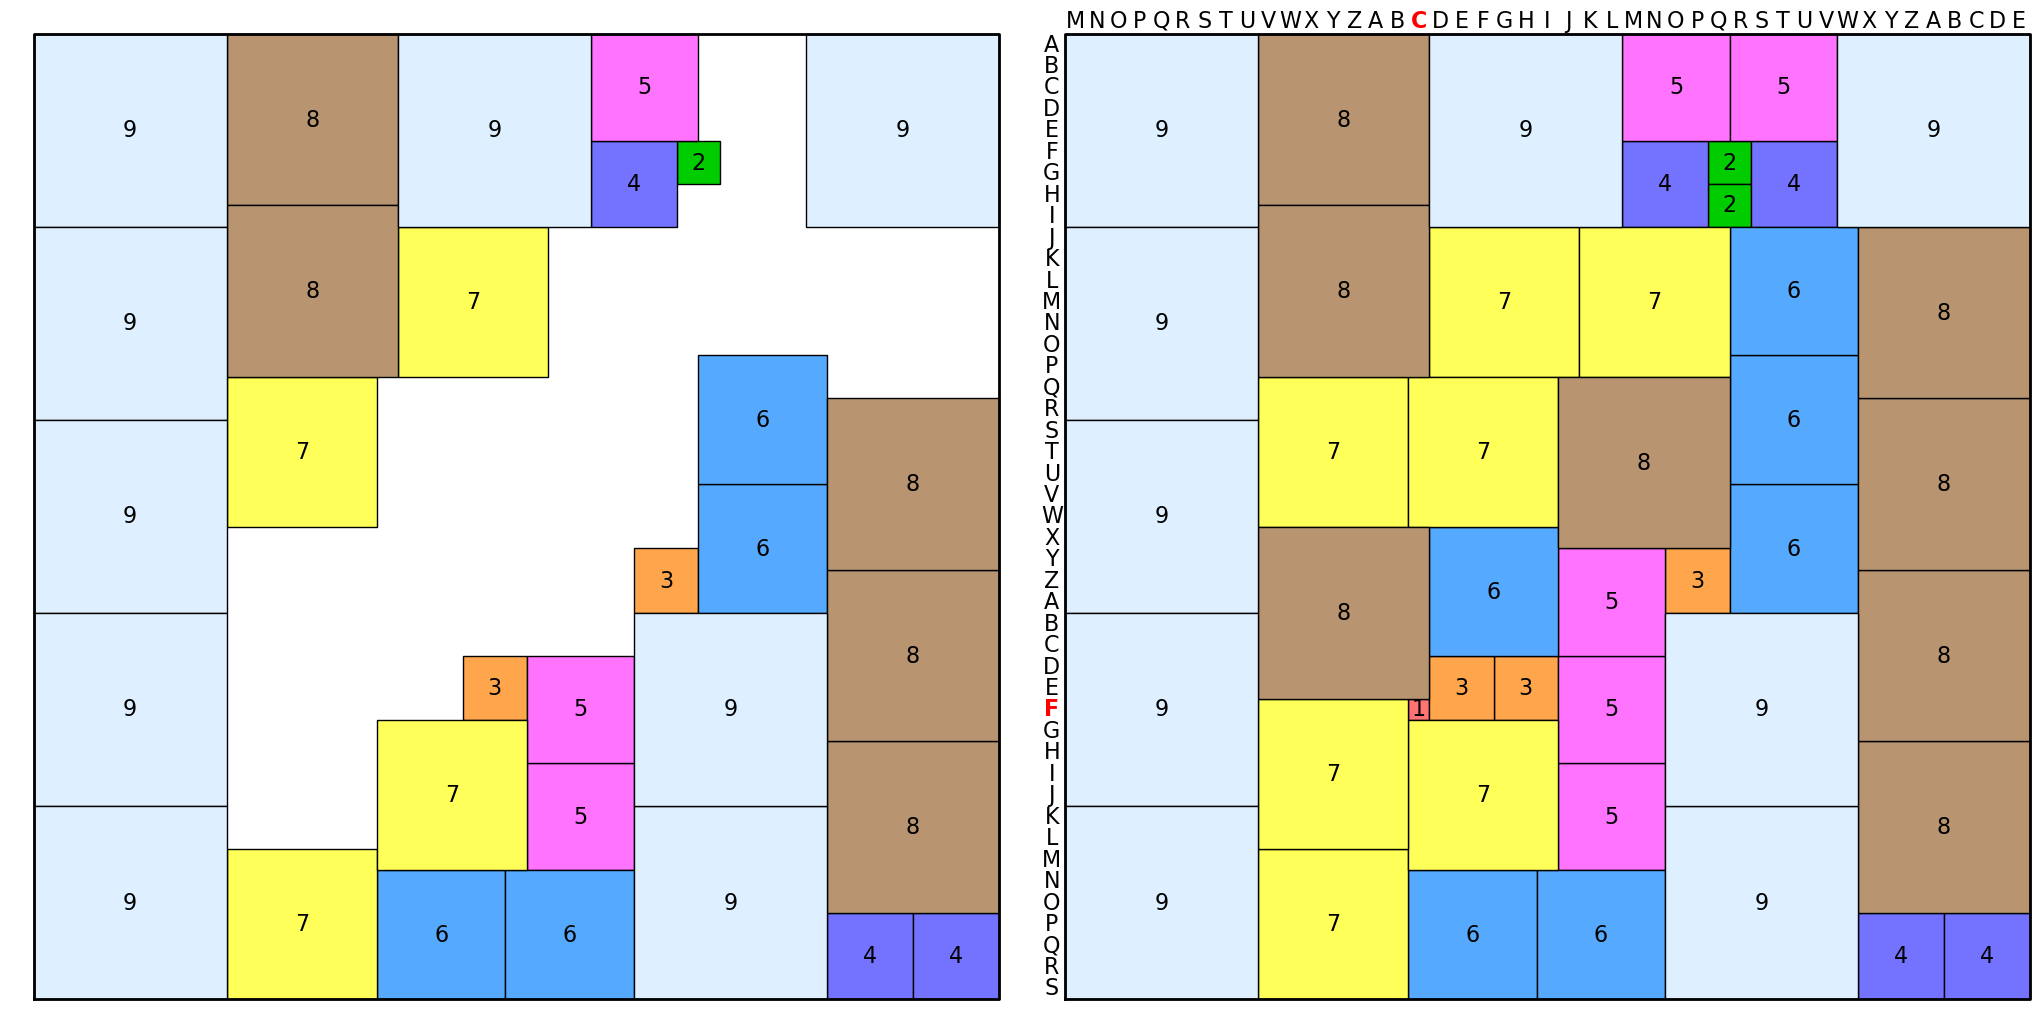

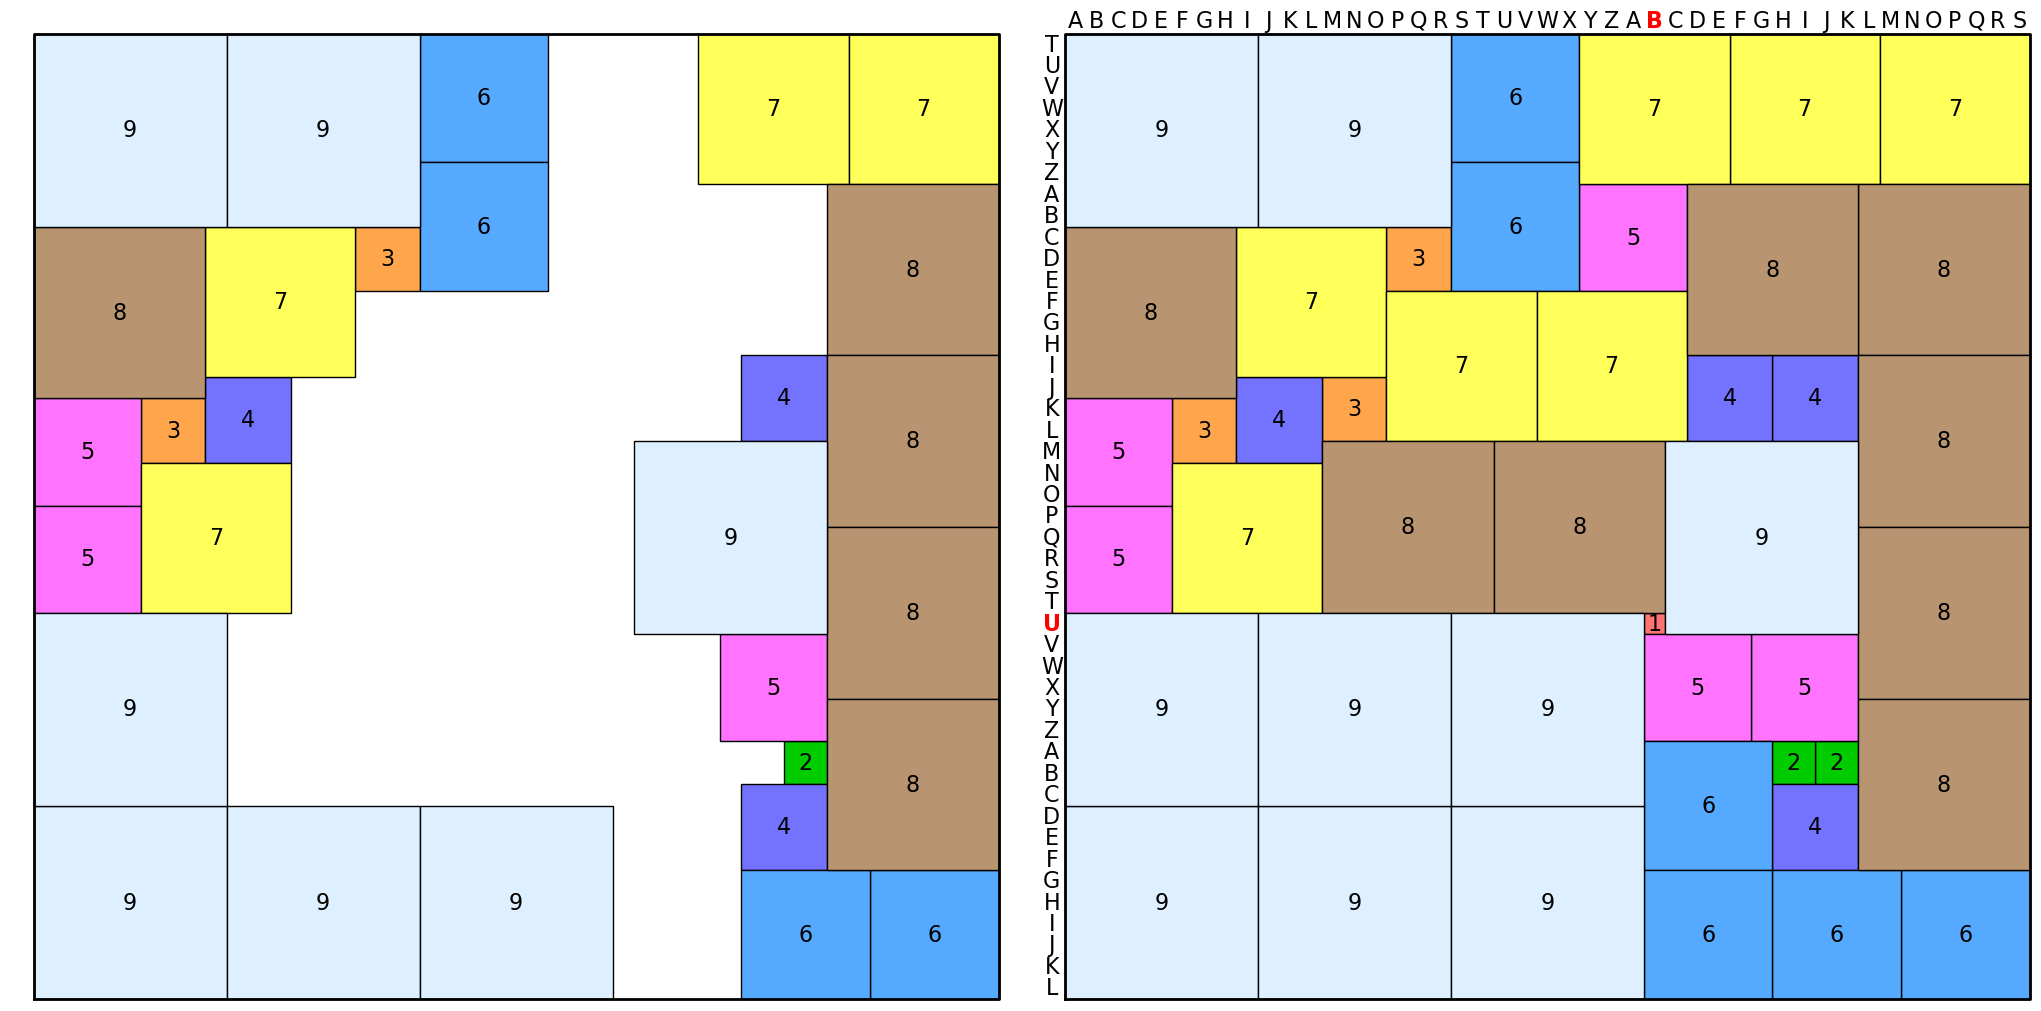

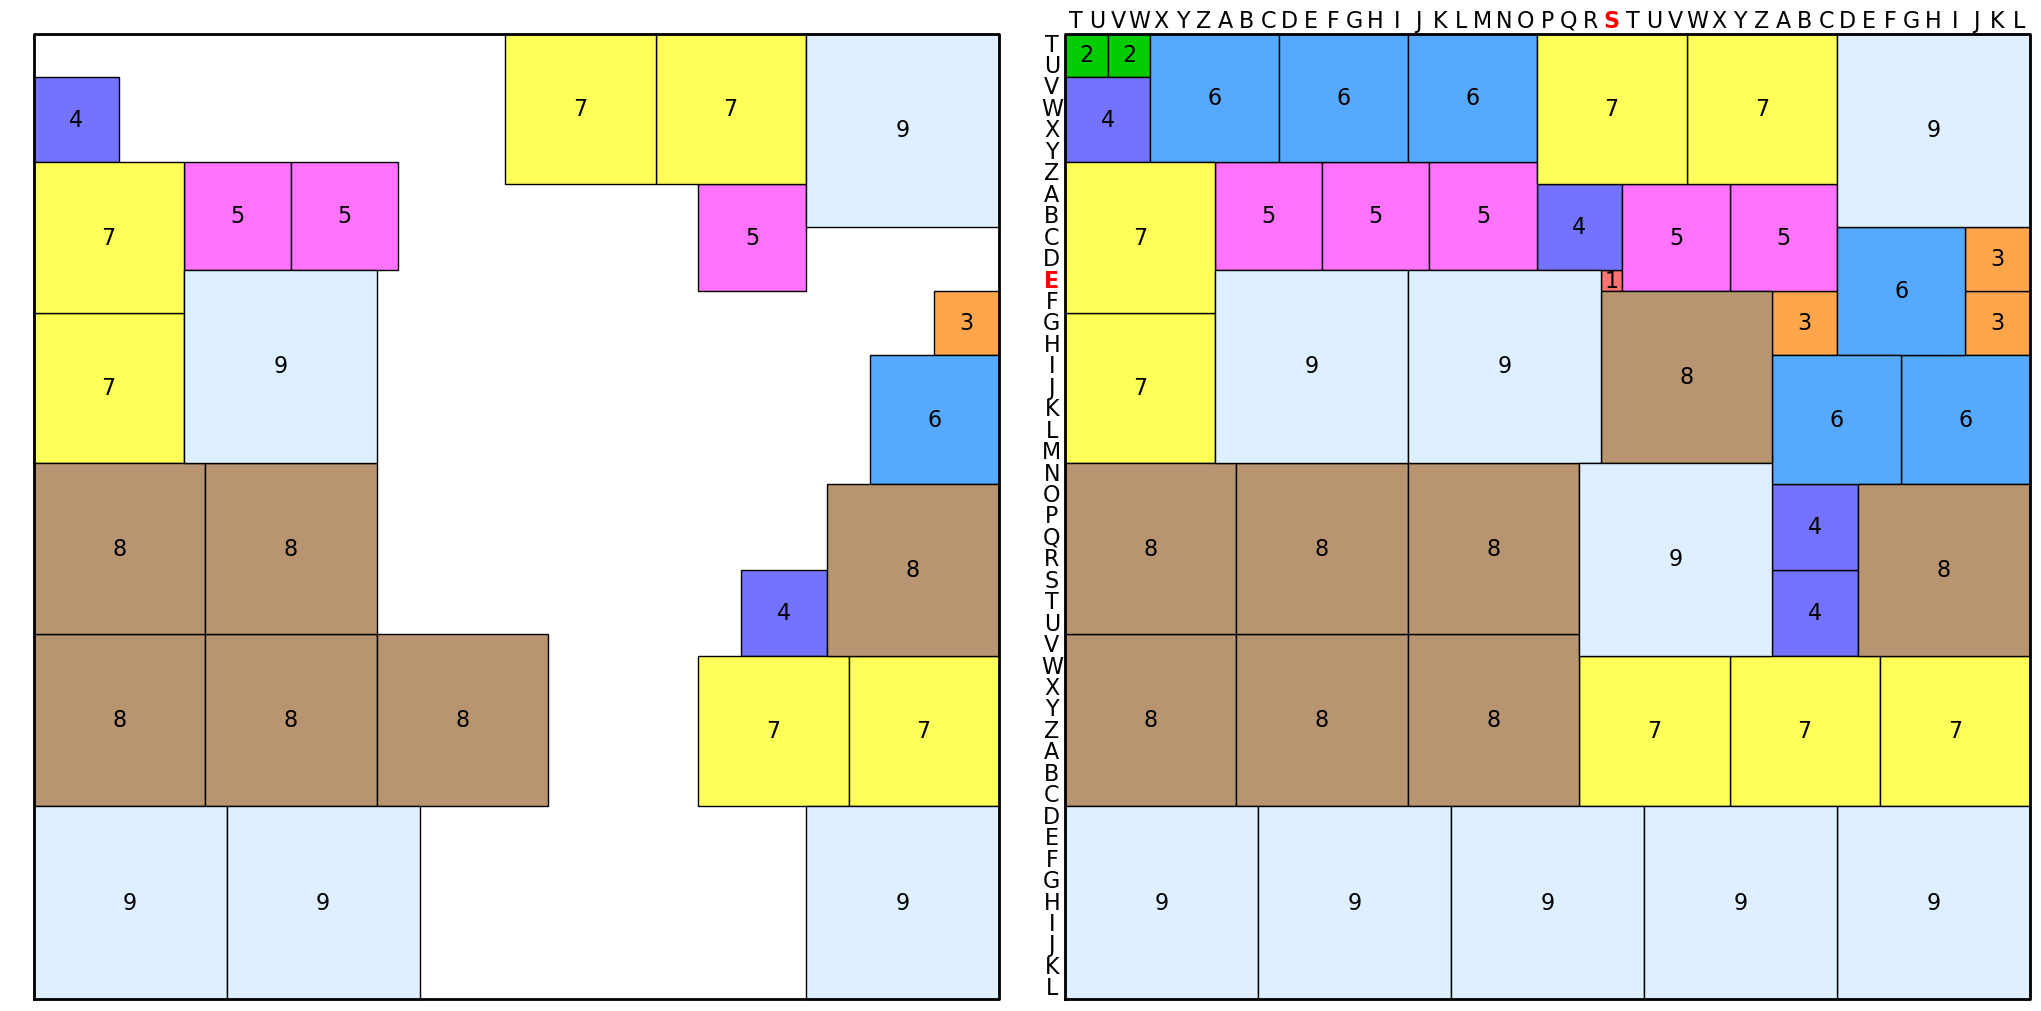

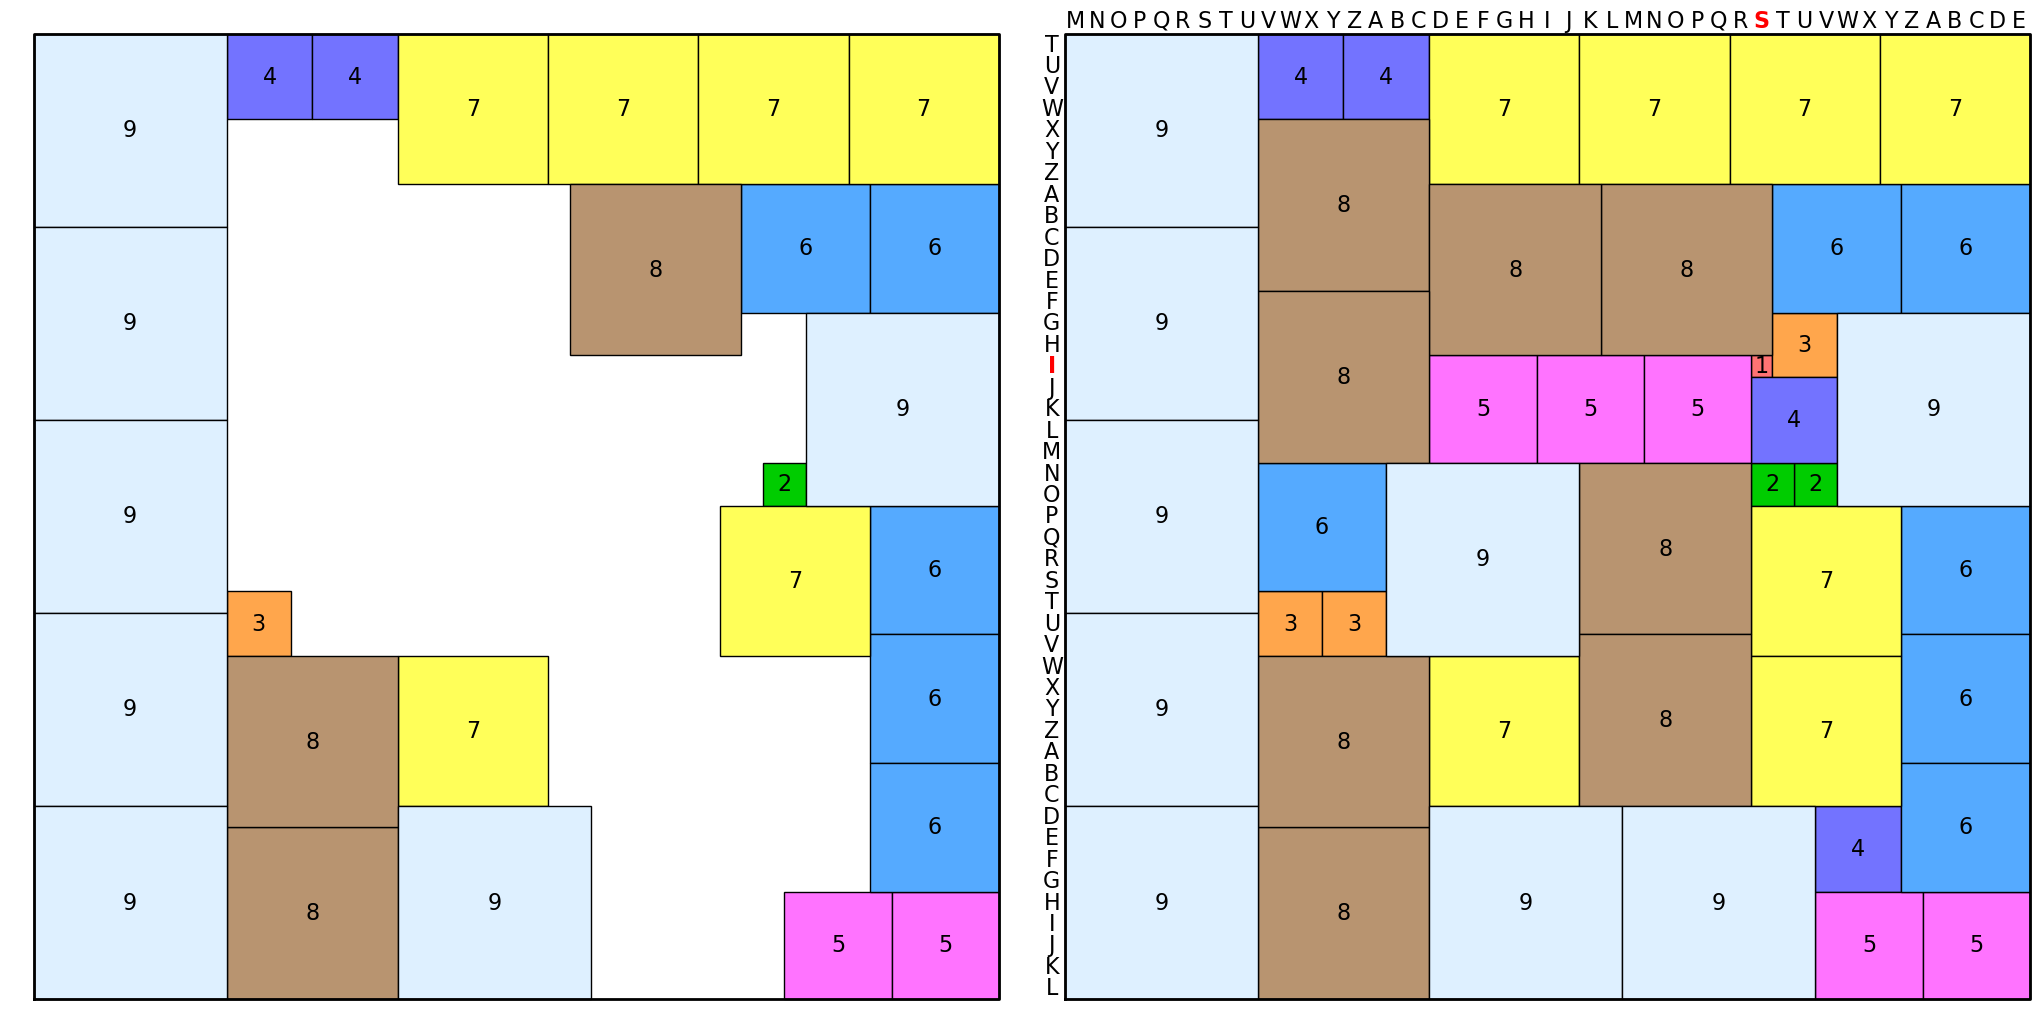

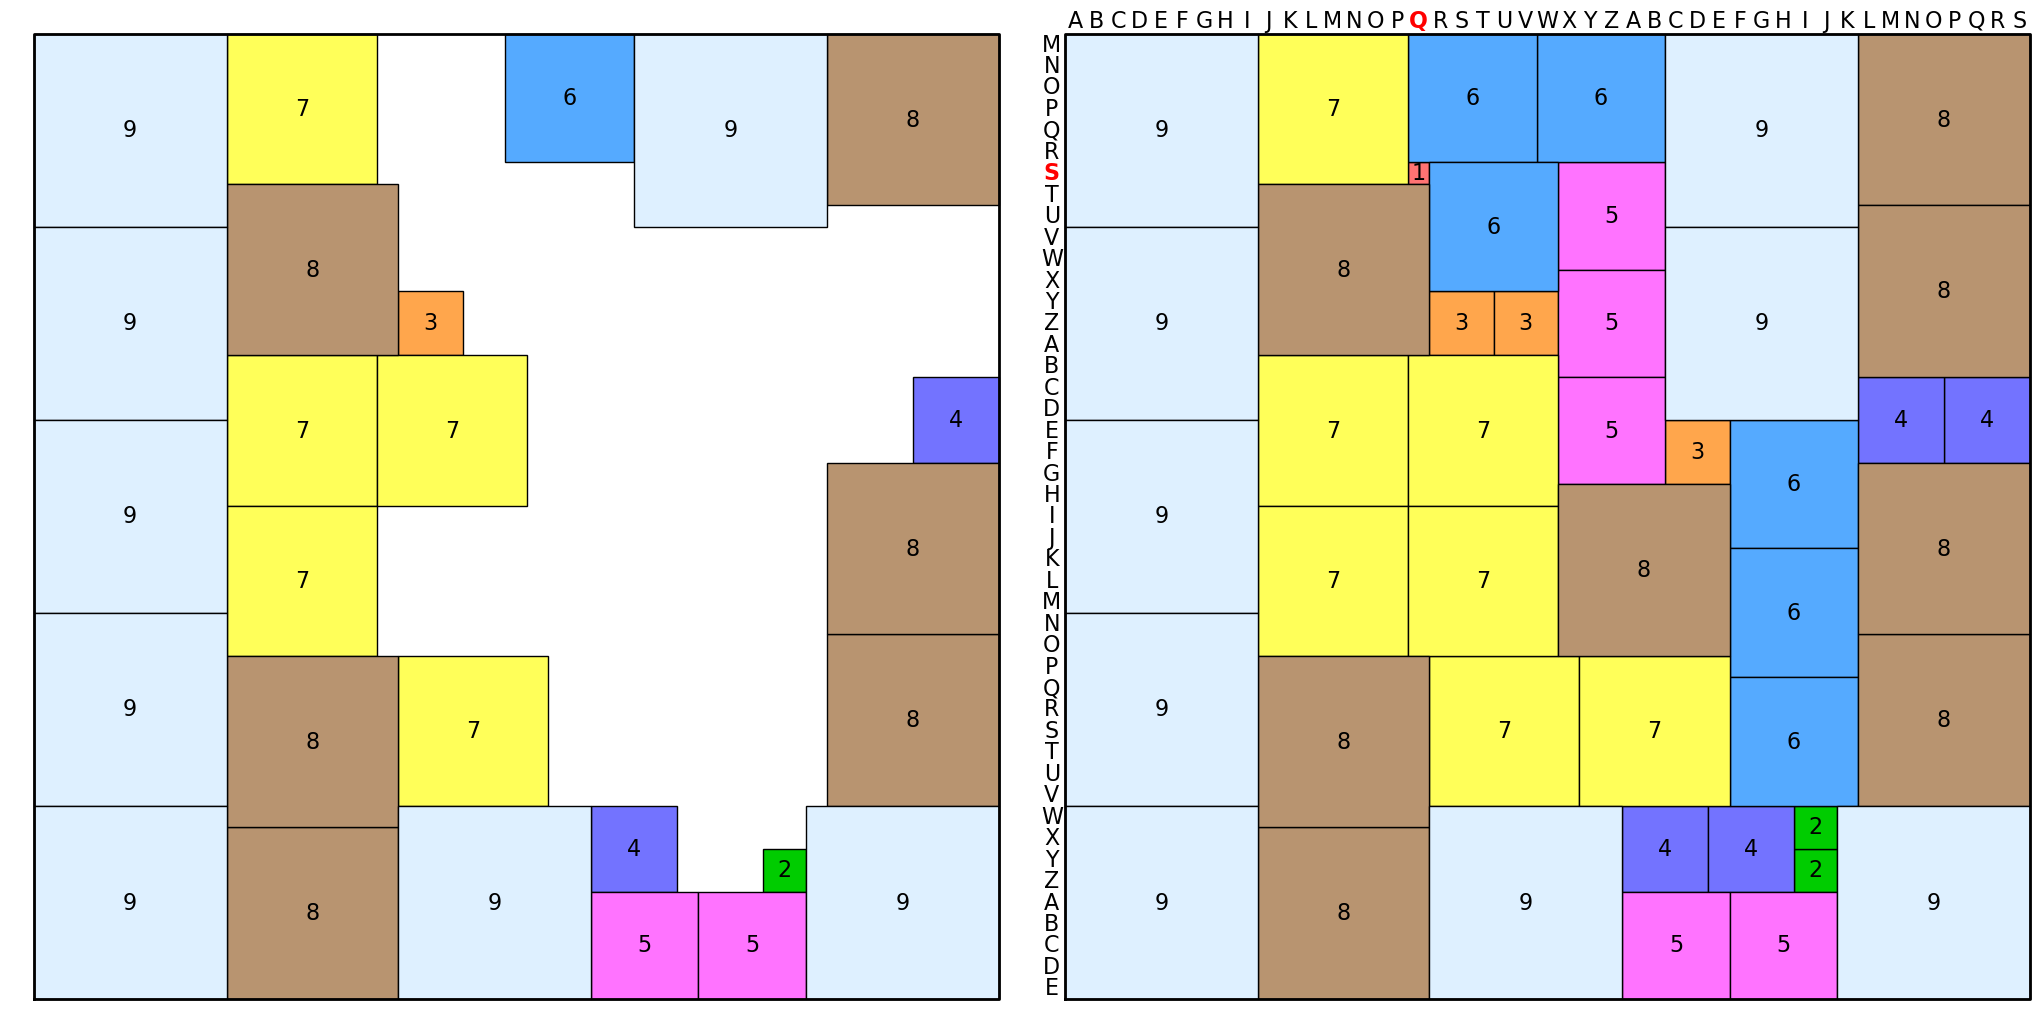

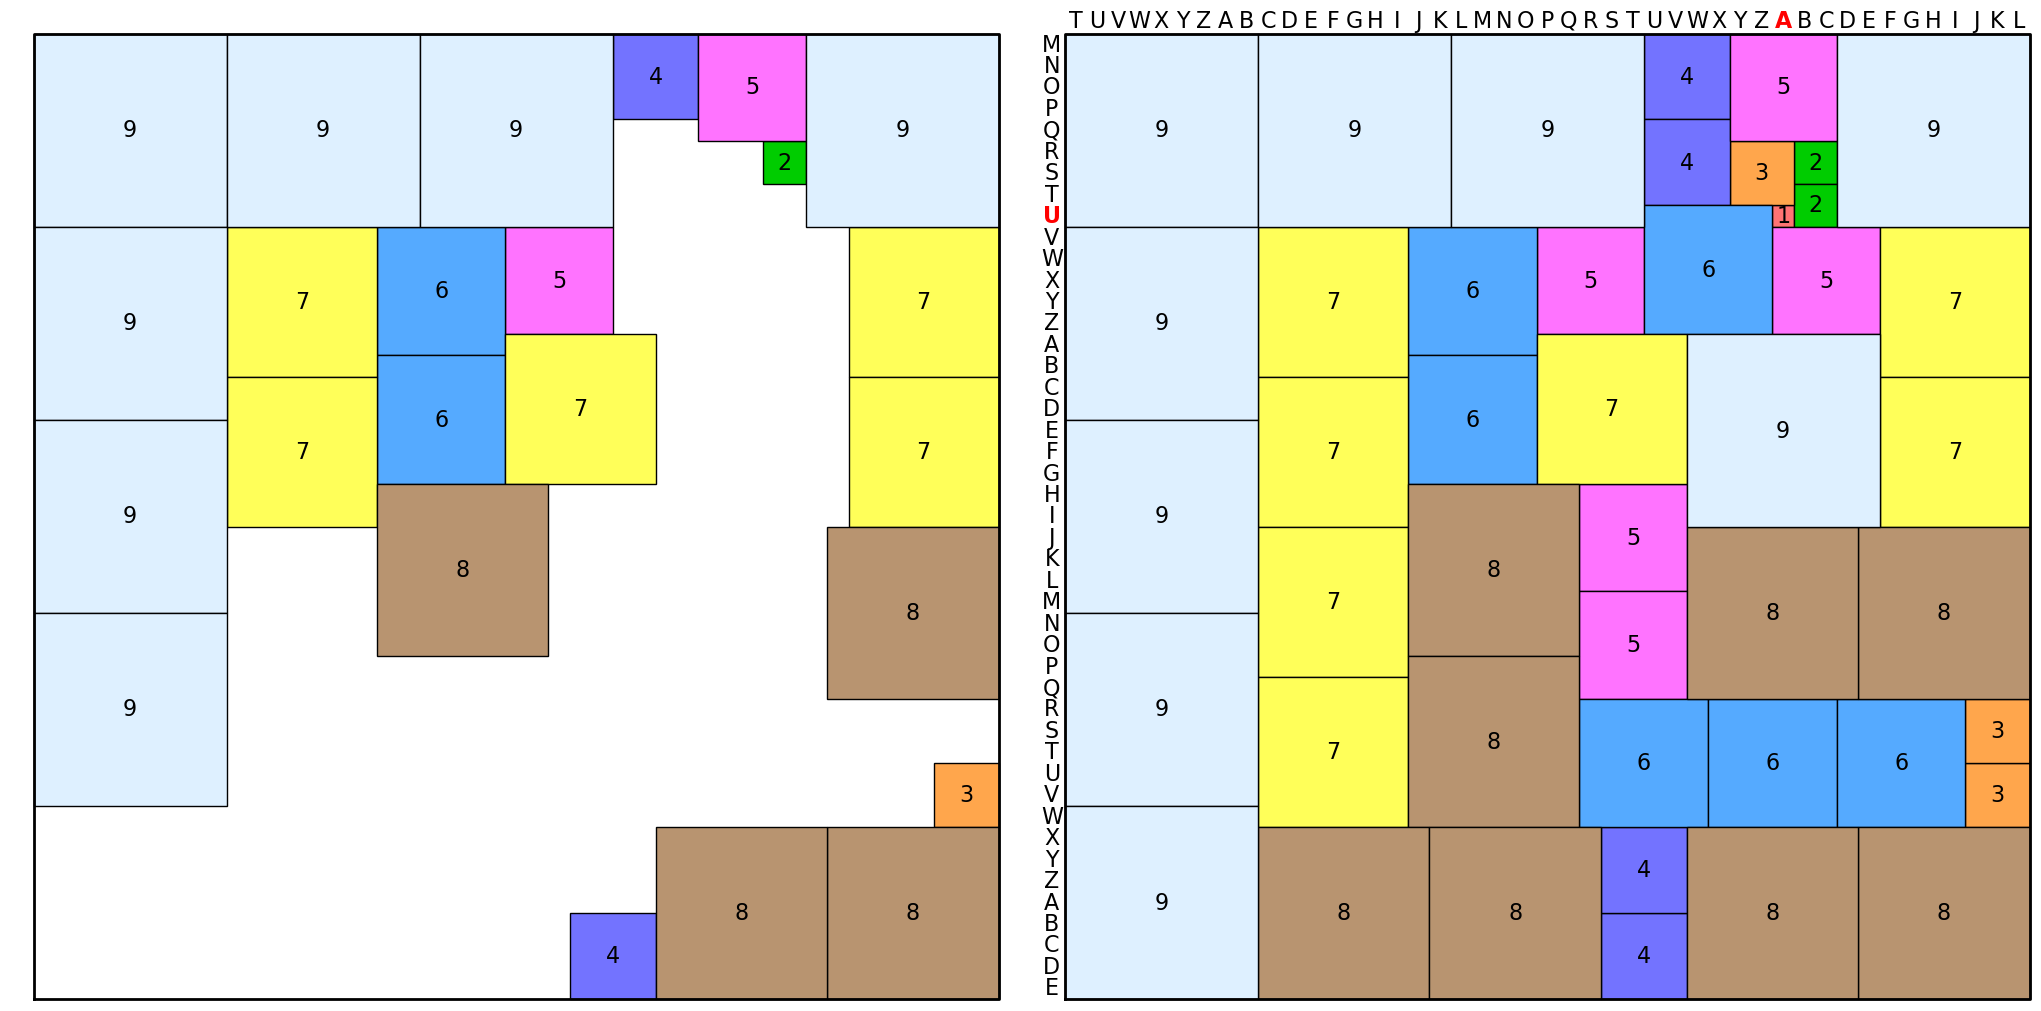

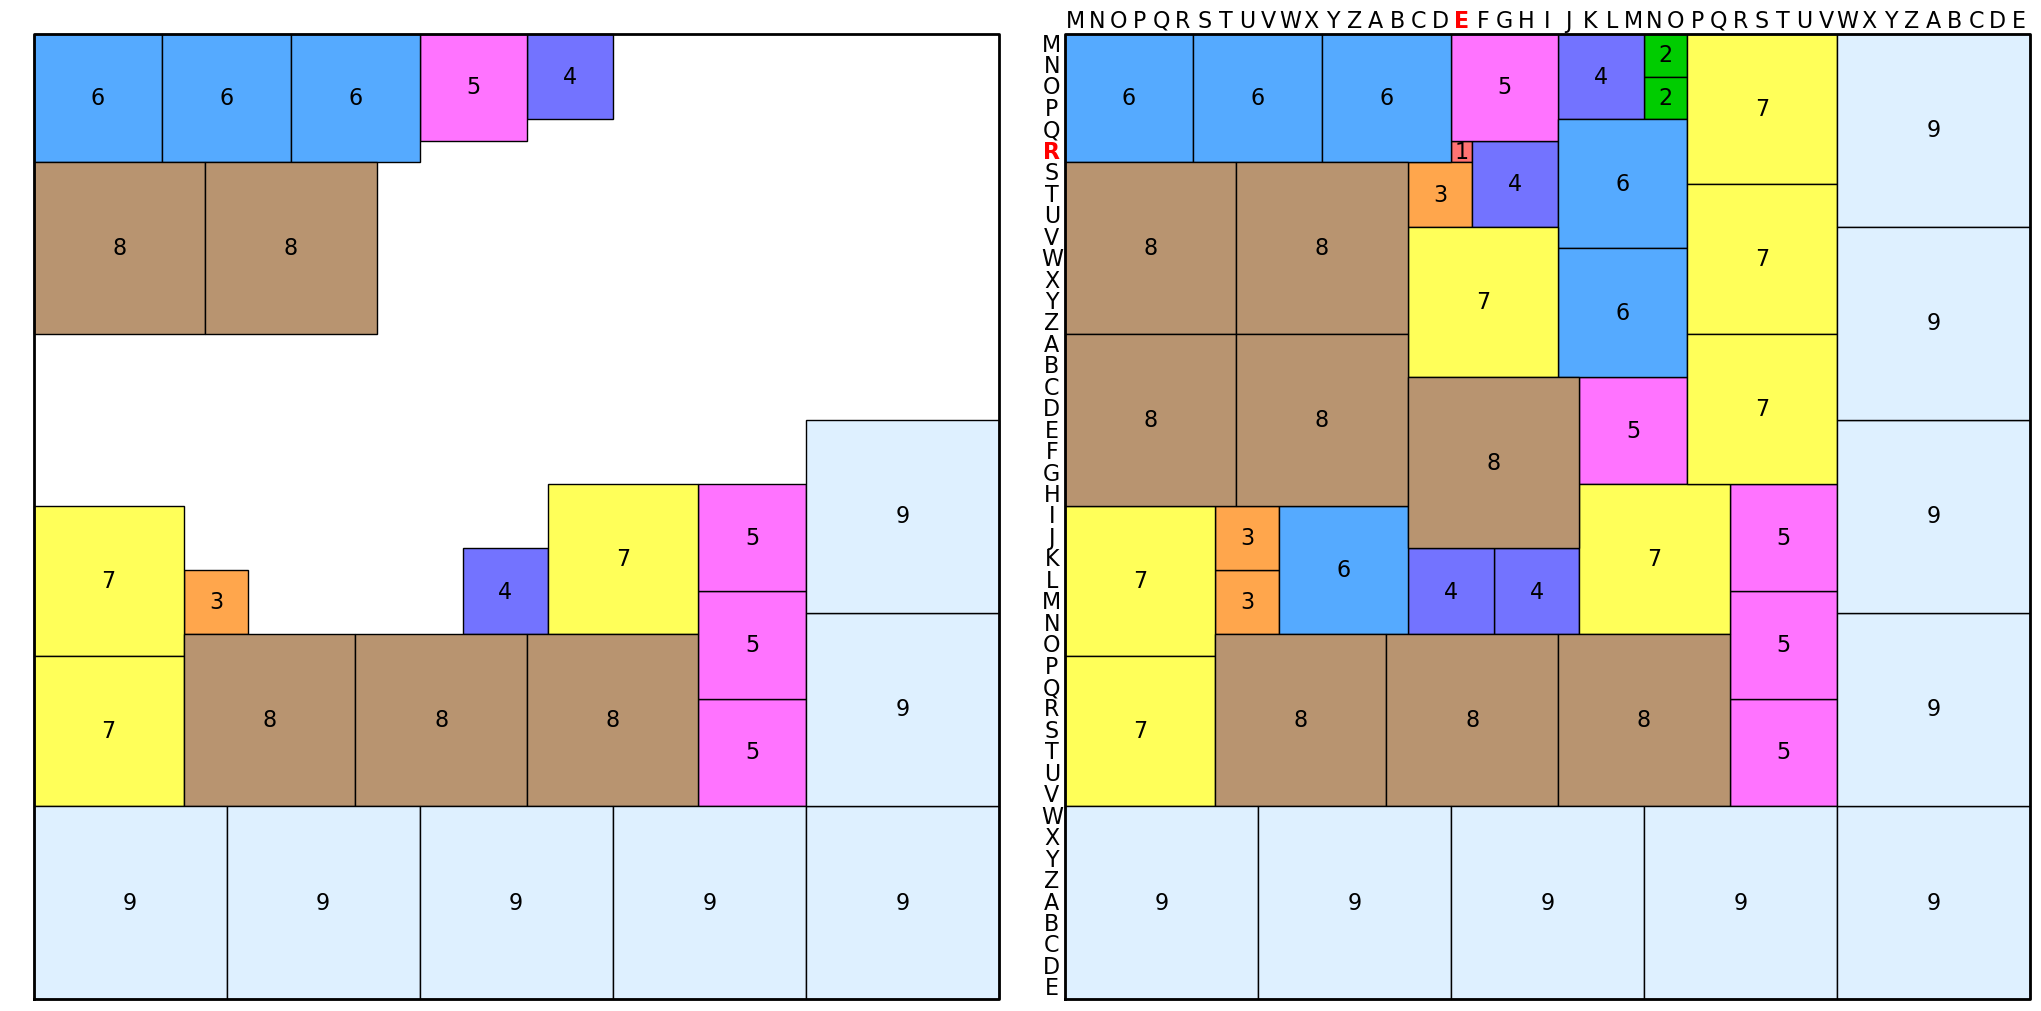

In [4]:
n = 9
grid_side = n*(n+1)//2

for (i,j),g in sorted(tilings.items(), key=op.itemgetter(0)):
    fig, axs = plt.subplots(1, 2, figsize=(20 + 0.5, 10), constrained_layout=True)
    _,one_pos = g['final'][0]
    draw_partridge_tiling(9, g['initial'], ax=axs[0])
    draw_partridge_tiling(9, g['final'], ax=axs[1], 
                        letters=(rotated(string.ascii_uppercase, i*grid_side), rotated(string.ascii_uppercase, j*grid_side)), 
                        highlighted_letters=one_pos)

    # sol = tuple(tuple(it.islice(it.cycle(rotated(string.ascii_uppercase, k*grid_side)), grid_side))[p] for k,p in zip([i,j], one_pos))
    # print(f"#### Grid ({i}, {j})\n\n![](partridge_tiling_{i}_{j}_sol.png)\n\nTiling configuration: `{g['final']}`\n")
    fig.savefig(f"partridge_tiling_{i}_{j}_sol.png", dpi=72*2, bbox_inches='tight')